# Classification avec KNN

Si vous vous rapplez du chapitre 2, le Machine Learning peut être utilisé pour deux tâches: la régression et la classification. Nous avons introduit la régression dans le chapitre précédent, il est donc temps de présenter la classification. 

Comme son nom l'indique, le but est de catégoriser des points de données comme étant malades ou sains, un chiffre entre 0 et 9, des bus, avions, etc. La différence principale entre la régression et la classification est que le modèle prédit des entiers et non des nombres réels.

Comme pour la régression, beaucoup de modèles existent pour la classification tel que les arbres, la régression logistique et même les réseaux neuronaux. Cependant, ce chapitre va se concentrer sur K-Nearest Neighbours (KNN) car c'est le modèle le plus visuel et simple. Il est aussi relativement performant et est modulable pour s'adapter au problème. 


## K-Nearest Neighbours

Ce modèle part du principe que les données proches dans un espace forment un groupe qui appartient à une certaine catégorie. Le but est simple, nous devons trouver les points les plus proches de celui que nous souhaitons classifier et mettre leurs catégories en commun. Par exemple, on peut classifier un point comme étant de la classe la plus présente dans ces voisins. C'est cette approche qui est utilisé dans le gif qui suit. 

:::{figure-md} fonc_-fig
<img src="src/knn_gif.gif" alt="Fonctionnement de Knn" width="750"/>

Fonctionnement de KNN
:::

Les lignes représentent les voisins sélectionné et leur catégorie. Vu que nous avons 4 points bleu et 1 point orange, notre point devient bleu. Ce GIF présente KNN avec 5 voisins, mais pourquoi 5 et pas 1 ou 10? De plus, je parle de distance mais comment est-elle calculée?
C'est sur ces deux points que la prochaine partie va se concentrer.

## Mesure de distance
Nous pouvons utiliser plusieurs méthodes de mesure différentes comme la mesure Euclidienne (l2-norm), celle de Manhattan (l1-norm), et d'autres. Le mesure la plus simple est la distance euclidienne qui calcule la distance dans l'espace cartésien.

$$distance(x_{new},x_n)=\sqrt{\sum_{a=1}^A(x_{new,a}-x_{n,a})^2}$$
$A$ représente tous les attributs.

Par facilité nous pouvons omettre la racine carrée et réécrire la formule en utilisant des vecteurs:

$$\begin{align}
    distance(x_{new},x_n)^2 &= \sum_{a=1}^A(x_{new,a}-x_{n,a})^2 \\
    &= \sum_{a=1}^A(x_{new,a}-x_{n,a})^T(x_{new,a}-x_{a,d}) \\
    &= (x_{new}-x_n)^T(x_{new}-x_n)
\end{align}$$

Cette formulation est la plus répendue et est pratique car les ordinateurs sont particulièrement performants pour le calcul vectoriel. Il est important de noter que $T$ représente la transposée. 

Imaginons que nous voulons calculer la distance entre un point $x_{new}=\begin{bmatrix} 0.5 \\ 0.5 \end{bmatrix}$, et deux autres points $x_1= \begin{bmatrix} 0 \\ 0 \end{bmatrix}$ et $x_2= \begin{bmatrix} 0.75 \\ 0.75 \end{bmatrix}$.

$$\begin{align}
    distance(x_{new}, x_1)^2 &= (x_{new}-x_1)^T(x_{new}-x_1) \\
        &= \begin{bmatrix} 0.5 & 0.5 \end{bmatrix}\begin{bmatrix} 0.5 \\ 0.5 \end{bmatrix} = 0.25+0.25 = 0.5 \\
    distance(x_{new}, x_2)^2 &= (x_{new}-x_2)^T(x_{new}-x_2) \\
        &= \begin{bmatrix} -0.25 & -0.25 \end{bmatrix}\begin{bmatrix} -0.25 \\ -0.25 \end{bmatrix} = 0.0625 + 0.0625 = 0.125
\end{align}$$

Le point $x_2$ est donc le plus proche de notre point.


Il est aussi possible de calculer la distance dans un autre espace grâce aux kernels. Cependant, cette méthode ne sera pas expliqué dans ce module. 

> Vous aurez remarqué que la distance d'un point s'évalue sur base de la différence entre chaque attribut. C'est pour cette raison qu'il faut de préférence normaliser les données quand on utilise KNN. Imaginons que nous avons un attributs dont les valeurs se trouvent entre 0 et 1, et un autre entre -100 et 100. Le second attribut aura plus de poids dans la mesure de distance car il aura de plus grande valeurs comparé au premier. 
Par exemple nous avons deux point; (0.5, 50) et (0.45, 0). La distance entre les deux premier attributs est de $(0.5-0.45)²=0.0025$ et entre les deuxièmes $(50-0)²=2500$. Ils auront donc une distance de 2500.0025 entre les deux alors qu'ils sont très proche dans le premier attribut. 
La normalisation est encore plus importante quand on décide d'utiliser des poids lors de l'aggrégation.

## Nombre de voisins

Maintenant que nous savons comment la distance sera mesurée il faut savoir combien de voisins nous devons prendre en compte. Pour voir les délimitations (bordures de décisions) entre 2 classes, nous pouvons créer un graphiques comme celui qui suit. Ce graphique présente les deux catégories ainsi que la bordure de décision. 

:::{figure-md} ks-fig
<img src="src/bordure_decision_knn.svg" alt="Influence du nombre de voisins sur la bordure de décision" width="750"/>

Influence du nombre de voisins sur la bordure de décision
:::

Nous pouvons voir que si nous utilisons 1 voisin, nous avons une poche dans les bleus où le point sera classifié comme orange. Utiliser 5 voisins semble suivre la forme de nos données alors qu'en utiliser plus linéarise la bordure. Bien que la meilleur façon de choisir le nombre de voisins en utilisants des mesures tel que l'accuracy ou le F1-score, créer un graphique nous permet de visualier la bordure et de comprendre le modèle.   

Il est dont primordial de déterminer le nombre optimal de voisins à prendre en compte. Le plus efficace et simple est d'utiliser les données d'entraînement pour trouver ce nombre. Nous pouvons déterminer une liste de nombres des voisins et entraîner chaque version avec l'ensemble d'entraînement et de l'évaluer sur l'ensemble de validation. La version du modèle la plus performante est celle que nous garderons. 

Un autre facteur déterminant est la balance des données. Si notre dataset d'entraînement n'est pas balancé et que nous avons 10 points qui sont de classe 1 et 90 de classe 2, utiliser un k > 10 va toujours prédire 2. 

## Agrégation des résultats
La dernière chose à déterminer est la façon dont on va aggréger les voisins. KNN est utilisé plus souvent dans les tâches de classification mais ce modèle peut aussi être utilisé pour de la régression.

### Classification

Le plus simple est d'attribuer la classe qui est la plus présente dans les voisins qui ont été selectionnés. Dans certain cas, on voudra prendre la distance des voisins en compte. En effet, il est possible que sur 5 voisins, notre point soit collé à deux points d'une classe mais qu'il ait 3 autres voisins assez distants. Si nous utilisons la première méthode, le point sera classifié comme appartenant à la même classe que les trois points distant. Ce problème peut-être résolu en prenant la distance en compte. Pour ce faire, on attribue un poids à chaque point. Si l'influence d'un voisin est inversement proportionnelle à sa distance, le nouveau point sera correctement classifié 
chaque vote, tel que l'inverse de la distance, les deux points proches auront l'avantage et notre nouveau point sera correctement classifié. 

### Régression
Dans le cas de régression, nous prendrons la moyenne de chaque voisins. Dans ce cas nous pouvons aussi prendre la distance en compte pour faire une moyenne pondérée. 

## Faiblesses du modèle
### Risque de sur-apprentissage
KNN ne fait que très peu d'hypothèses sur la forme que doit avoir la délimitation entre les classes.
Il a très peu de biais, ce qui lui permet de s'adapter à toute forme de délimitation, mais cela est aussi sa grosse faiblesse car il est très facile de sur-apprendre.
Lors de son utilisation, paufinez avec minutie le nombre de voisin pris en compte car c'est cela qui permet de régulariser la prédiction.

### Stockage des données & temps d'inférence
Pour que l'algorithme fonctionne bien, il faut stocker les données d'entraînement puisque c'est sur celles-ci que sont comparé les nouveaux points lors d'une prédiction.
De même, vous aurez besoin de calculer la distance de chaque nouveau point à classifier avec tous les points d'entraînement, ce qui peut être lent.
Vous l'aurez compris, si votre jeu de données est trop gros, KNN ne sera peut-être pas votre meilleure option.

Des méthodes existent pour contrer cela, en ne gardant par exemple uniquement les points représentatifs parmis ceux d'entraînement (voir le *Clustering*).

### La malédiction de la dimensionnalité
Nous savons que dans le cadre de la classification, KNN part du principe que les échantillons d'une même catégorie sont proches les uns des autres et que, idéalement, les données d'entraînement sont équilibrée. Un point important à prendre en compte est ce que l'on appelle "la malédiction de la dimensionnalité". Le volume d'une espace de données augmente exponentiellement avec le nombre d'attributs. Ainsi nous avons besoin d'une quantité exponentielle d'échantillons, sinon nous aurons des espaces quasi-vides et la distance entre chaque échantillon sera trop similaire. KNN évalue la distance entre un point et un autre en fonction de la distance dans chaque attribut ($(x_{new,a}-x_{n,a})^2$), il sera donc de plus en plus difficile pour KNN de trouver les voisins correctement.

## À retenir

- Lors de la classification, KNN part du principe que les échantillons de la même catégorie sont proches l'un de l'autre.
- KNN est un modèle assez simple mais qui est modulable afin de correspondre le plus possible à notre tâche.
- Il faut faire attention à l'équilibre de l'ensemble d'entraînement. 
- Ce modèle peut-être utilisé pour des tâches de classification ainsi que de régression. 

## Implémentation

Pour faciliter l'implémentation nous allons utiliser numpy. Nous allons aussi suivre l'architecture de scikit learn (Sklearn), c'est à dire que notre modèle possède une fonction **.fit** pour l'entraîner et **.predict** pour la prédiction. 

In [7]:
# Pour le modèle
import numpy as np

# Pour le plot
import plotly.express as px
import plotly.graph_objects as go

'''
-- Création de l'ensemble de données --
Notez que j'utilise une distribution normale ce qui permet d'avoir
tous les points d'une même classe relativement proches.
De plus, je génère un ensemble équilibré.
'''

elements = 50
random_state = 42
K = 5

def generate_data(elements, random_state):
    rng=np.random.RandomState(random_state)

    classes_x = rng.normal(0, 0.55, (2,elements))
    classes_y = rng.normal(1, 0.55, (2,elements))
    labels = np.concatenate((np.zeros(elements), np.ones(elements)))
    dset = np.zeros((2,elements*2))

    dset[0] = np.concatenate((classes_x[0], classes_y[0]))
    dset[1] = np.concatenate((classes_x[1], classes_y[1]))

    return dset, labels

'''
-- Implémentation du modèle --
'''

class KNN:
    def __init__(self, K):
        self.K = K
    

    def fit(self, data, labels):
        self.data = data
        self.labels = labels
    
    
    def predict(self, data_point):
        preds = []

        for dp in data_point:
            distances = []

            for point in self.data:
                distances.append(self.distance(dp, point)) 

            sorted_distances = np.argsort(distances)

            preds.append(np.bincount(self.labels[sorted_distances[:self.K]].astype(int)).argmax())
        
        return np.array(preds)
    

    def distance(self, x_new, x):
        return np.dot(x_new-x, x_new-x)

Maintenant que nous avons un modèle et une méthode de génération de données, nous pouvons l'utiliser pour faire des prédictions. Nous allons générer 10 points de chaque classe. Vu que nous avons un ensemble équilibré et binaire, nous pouvons utiliser l'accuracy. Cette mesure calcule le pourcentage de mauvaise prédiction.

In [8]:
# On génère les données d'entraînement et on "fit" le modèle
train_set, train_labels = generate_data(elements, random_state)

# Ensuite on le teste en générant le set de test 
elements = 10
test_set, test_labels = generate_data(elements, random_state)
    
model = KNN(5)
model.fit(train_set.T, train_labels)

preds = model.predict(test_set.T)

print(np.sum(preds != test_labels)/len(test_labels))

0.1


Nous avons deux erreurs sur les 20 points, ce qui donne une accuracy de 0.1. C'est plutôt pas mal. Pour comprendre d'où elles viennent, nous pouvons tracer la bordure avec les points d'entraînements et de test. 

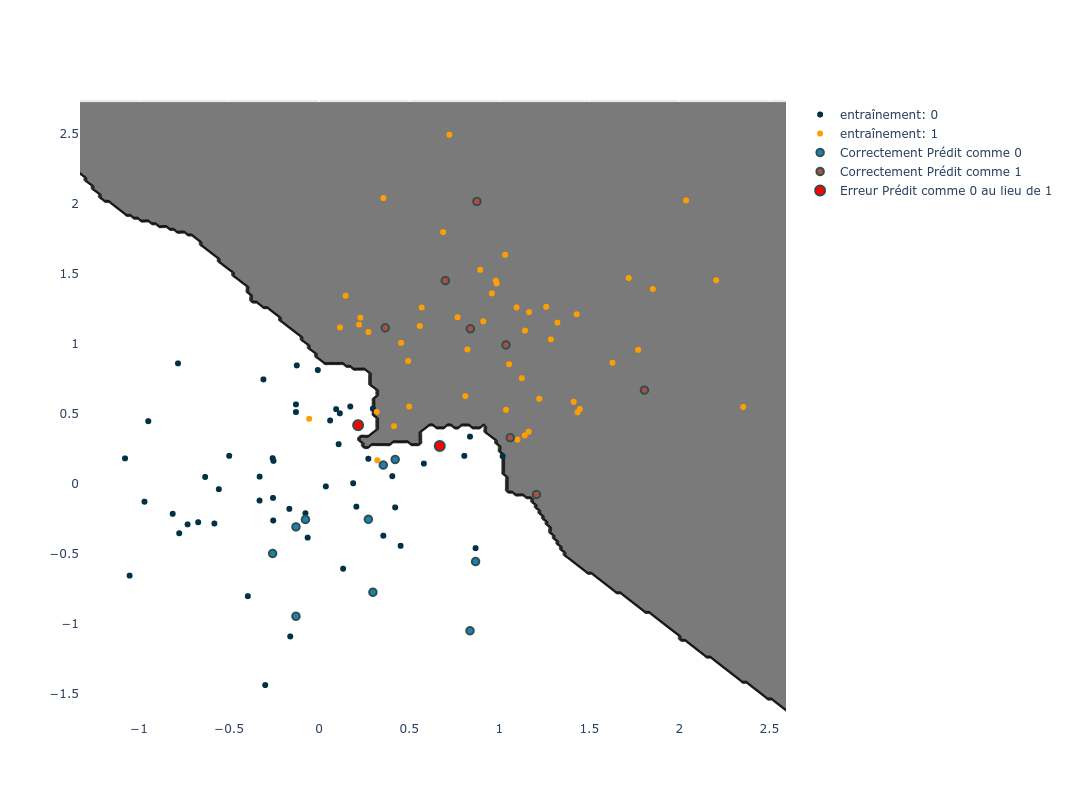

In [9]:
# Code utilisé pour générer l'image

# Création du mesh pour voir la bordure de décision
mesh_size = .02
margin = 0.25

# Create a mesh grid on which we will run our model
x_min, x_max = train_set[0].min() - margin, train_set[0].max() + margin
y_min, y_max = train_set[1].min() - margin, train_set[1].max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Les couleurs pour la bordure
color_scale = [[0, "rgb(255, 255, 255)"], [1, "rgb(122, 122, 122)"]]

preds = model.predict(test_set.T)
preds[preds != test_labels] = -1    

Z = np.array(model.predict(np.c_[xx.ravel(), yy.ravel()])).astype(str)
Z = Z.reshape(xx.shape)

fig = go.Figure()

fig.add_trace(
    go.Contour(
        x=xrange,
        y=yrange,
        z=Z,
        colorscale=color_scale,
        showscale=False
    )
)

fig.add_trace(
    go.Scatter(x=train_set[0][train_labels == 0], y=train_set[1][train_labels==0], mode="markers",
      marker=dict(color="rgb(2,48,71)"), name="entraînement: 0"
    )
)

fig.add_trace(
    go.Scatter(x=train_set[0][train_labels == 1], y=train_set[1][train_labels==1], mode="markers",
      marker=dict(color="rgb(255,158,2)"), name="entraînement: 1"
    )
)

fig.add_trace(
    go.Scatter(x=test_set[0][preds == 0], y=test_set[1][preds==0], mode="markers",
      marker=dict(color="rgb(28,128,178)", size=7.5, line=dict(width=2, color='DarkSlateGrey')),
                  name="Correctement Prédit comme 0"
    )
)

fig.add_trace(
    go.Scatter(x=test_set[0][preds == 1], y=test_set[1][preds==1], mode="markers",
      marker=dict(color="rgb(176,78,68)", size=7.5, line=dict(width=2, color='DarkSlateGrey')),
                  name="Correctement Prédit comme 1"
    )
)

fig.add_trace(
    go.Scatter(x=test_set[0][preds == -1], y=test_set[1][preds==-1], mode="markers",
      marker=dict(color="rgb(255,0,0)", size=10, line=dict(width=2, color='DarkSlateGrey')),
                  name="Erreur Prédit comme 0 au lieu de 1"
    )
)

fig.update_layout(height=800, width=800)


Nous pouvons voir sur le graphique que que les deux erreurs sont deux points qui devaient être des 1 des prédit comme étant des 2. On voit que c'est lié à la bordure de décision. On peut toujours adapter le nombre de voisins afin de réduire l'erreur mais il faut faire attention à l'overfitting!

## Sources
- Cours "Algorithms for Machine Learning and Inference" de Chalmers University of Technology

<!--
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

h = .02
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

random_state = 42
rng=np.random.RandomState(random_state )

x1 = rng.normal(0, 0.55, 50)
y1 = rng.normal(0, 0.55, 50)

x2 = rng.normal(1, 0.55, 50)
y2 = rng.normal(1, 0.55, 50)

x = np.concatenate((x1, x2))
y = np.concatenate((y1, y2))
labels = np.concatenate((np.full(len(x1), 0), np.full(len(x2), 1)))

f, axis = plt.subplots(1, 4, sharey=True, figsize=(15,15))

line = 0

for ind, k in enumerate([1, 5, 10, 15]):
    
    if ind > 3:
        ind -= 4
        line = 1
        
    X = np.transpose(np.array([x,y]))
                        
    kNN = KNeighborsClassifier(k)
    kNN.fit(X, labels)

    np.transpose(X)

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = kNN.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    #plt.figure()
    axis[ind].pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    axis[ind].scatter(X[:,0], X[:,1], c=labels, cmap=cmap_bold)
    axis[ind].set_xlim(xx.min(), xx.max())
    axis[ind].set_ylim(yy.min(), yy.max())
    axis[ind].set(aspect=1)
    axis[ind].set_title(f"k={k}")
    
plt.tight_layout()
plt.savefig("choix_des_k", bbox_inches='tight', pad_inches=0)
plt.show()
-->